<img src="files/pandas.png"/>

* Librairie dédiée à l'analyse de données
* Permet de créer des tableaux similaires aux data.frame de R c'est à dire des tableaux pouvant contenir des données de type différent
* Dispose aussi de fonction pour le tri de données et l'application de fonctions à ces données triées
* Avec numpy, matplotlib et scipy permet de faire une véritable analyse de données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Chargement d'un fichier csv

In [15]:
donnees = pd.read_csv("data.csv", sep=";")
donnees.shape

(1600, 27)

In [3]:
donnees.head()

,session,joueur,BP_periode,BP_traitement,BP_groupe,BP_dotation,BP_contribution,BP_contribution_groupe,BP_decision_time,BP_gain_periode,BP_gain_cumule,naissance,genre,nationalite,couple,etudiant,etudiant_discipline,etudiant_niveau,experiences,fratrie_nombre,
0,201501201125,201501201125_j_34,1,0,201501201125_g_0,20,16,52,0,24.8,24.8,1968,0,77,0,1,6,3,0,8,...
1,201501201125,201501201125_j_34,2,0,201501201125_g_0,20,2,28,0,29.2,54.0,1968,0,77,0,1,6,3,0,8,...
2,201501201125,201501201125_j_34,3,0,201501201125_g_0,20,12,41,0,24.4,78.4,1968,0,77,0,1,6,3,0,8,...
3,201501201125,201501201125_j_34,4,0,201501201125_g_0,20,0,21,0,28.4,106.8,1968,0,77,0,1,6,3,0,8,...
4,201501201125,201501201125_j_34,5,0,201501201125_g_0,20,15,43,0,22.2,129.0,1968,0,77,0,1,6,3,0,8,...


## groupby

Permet de grouper les données par rapport à une ou plusieurs variables

### Contributions moyennes par traitement

In [9]:
contrib_treat = donnees.groupby(donnees.BP_traitement).mean()
contrib_treat.BP_contribution

BP_traitement
0                 9.82500
1                14.90625
Name: BP_contribution, dtype: float64

### Contributions moyennes par groupe

On groupe les données par traitement et par groupe, et on calcule la moyenne

In [13]:
contrib_treat_groups = donnees.groupby([donnees.BP_traitement, donnees.BP_groupe]).mean()

In [14]:
# Affichage de la contribution moyenne par traitement et par groupe
pd.DataFrame(contrib_treat_groups.BP_contribution)

BP_contribution
BP_traitement BP_groupe                        
0             201501201125_g_0          10.1000
              201501201125_g_1          10.1750
              201501201125_g_2           9.1000
              201501201125_g_3          10.9125
              201501201125_g_4          11.2000
              201501201125_g_5          10.4500
              201501201125_g_6           9.5625
              201501201125_g_7           8.6500
              201501201125_g_8           9.3625
              201501201125_g_9           8.7375
1             201501201127_g_0          15.1000
              201501201127_g_1          14.4125
              201501201127_g_2          14.9125
              201501201127_g_3          14.9500
              201501201127_g_4          15.2250
              201501201127_g_5          15.0000
              201501201127_g_6          14.9500
              201501201127_g_7          14.3625
              201501201127_g_8          14.8250
              201501201127_g_9          15.3250

[20 rows x 1 columns]

### Boxplot des contributions moyennes par traitement

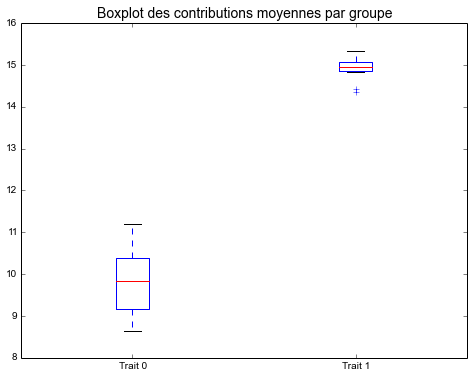

In [53]:
fig, graph = plt.subplots(figsize=(8, 6))
graph.boxplot([contrib_treat_groups.loc[0].BP_contribution, contrib_treat_groups.loc[1].BP_contribution])
graph.set_xticklabels(["Trait 0", "Trait 1"])
graph.set_title("Boxplot des contributions moyennes par groupe", fontsize=14)

#### Amélioration du graphique

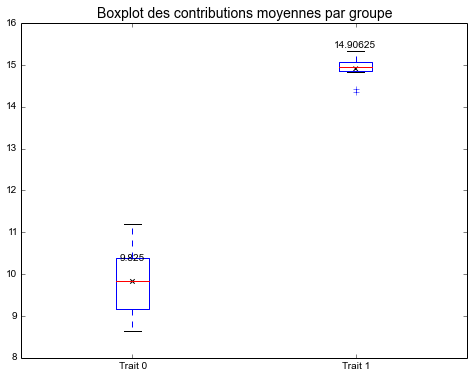

In [52]:
fig, graph = plt.subplots(figsize=(8, 6))
graph.boxplot([contrib_treat_groups.loc[0].BP_contribution, contrib_treat_groups.loc[1].BP_contribution])
graph.set_xticklabels(["Trait 0", "Trait 1"])
graph.set_title("Boxplot des contributions moyennes par groupe", fontsize=14)
graph.scatter([1, 2], contrib_treat.BP_contribution, c="black", marker="x")
graph.text(1, contrib_treat.loc[0].BP_contribution + 0.5, contrib_treat.loc[0].BP_contribution, 
           horizontalalignment='center') 
graph.text(2, contrib_treat.loc[1].BP_contribution + 0.5, contrib_treat.loc[1].BP_contribution, 
           horizontalalignment='center')

### Evolution de la contribution moyenne par traitement

In [29]:
contrib_treat_evol = donnees.groupby([donnees.BP_traitement, donnees.BP_periode]).mean()
pd.DataFrame(contrib_treat_evol.BP_contribution)

BP_contribution
BP_traitement BP_periode                 
0             1                    11.675
              2                     8.525
              3                    10.350
              4                    11.050
              5                    10.925
              6                    10.125
              7                     9.425
              8                     8.950
              9                     9.800
              10                    9.750
              11                    9.900
              12                   11.375
              13                    9.075
              14                    8.900
              15                    9.100
              16                    8.925
              17                    9.700
              18                    9.375
              19                   10.475
              20                    9.100
1             1                    14.700
              2                    15.050
              3                    14.725
              4                    14.100
              5                    14.975
              6                    14.825
              7                    15.025
              8                    14.200
              9                    14.450
              10                   14.250
              11                   14.575
              12                   14.825
              13                   14.975
              14                   15.450
              15                   14.600
              16                   14.950
              17                   15.300
              18                   15.500
              19                   15.650
              20                   16.000

[40 rows x 1 columns]

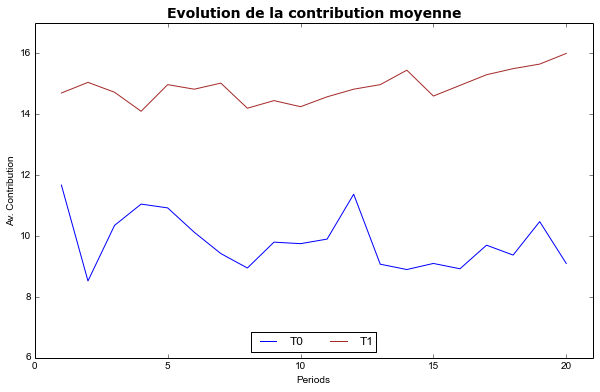

In [44]:
fig, graph = plt.subplots(figsize=(10, 6))
graph.plot(range(1, 21), contrib_treat_evol.loc[0].BP_contribution, label="T0", color="blue")
graph.plot(range(1, 21), contrib_treat_evol.loc[1].BP_contribution, label="T1", color="brown")
graph.set_xlim(0, 21)
graph.set_xlabel("Periods")
graph.set_ylim(6, 17)
graph.set_ylabel("Av. Contribution")
graph.set_title("Evolution de la contribution moyenne", fontsize=14, fontweight="bold")
graph.legend(loc=8, ncol=2)

### Test statistique

**Test de Mann Whitney (two-sided) sur les contributions moyennes par groupe**   
$H_0$: les contributions moyennes ne sont pas significativement différentes entre les deux traitements

In [49]:
mw = stats.mannwhitneyu(contrib_treat_groups.loc[0].BP_contribution, contrib_treat_groups.loc[1].BP_contribution)

In [51]:
cl = "H0 est rejetée, il y a un effet de traitement significatif" if mw[1] < 0.05 else \
     "H0 ne peut être rejetée, il n'y a pas d'effet de traitement significatif"
print("p-value={:0.3f}\n{}".format(mw[1], cl))

p-value=0.000
H0 est rejetée, il y a un effet de traitement significatif


# Sources

* http://pandas.pydata.org/pandas-docs/dev/10min.html#min
* http://pandas.pydata.org/pandas-docs/stable/groupby.html
* http://pandas.pydata.org/pandas-docs/stable/dsintro.html